<a href="https://colab.research.google.com/github/prokudin/JAMDiFF_library/blob/main/JAMDiFF_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Institutions and Authors**
* Christopher Cocuzza <christopher.cocuzza@temple.edu>
* Andreas Metz <metza@temple.edu>
* Daniel Pitonyak <pitonyak@lvc.edu>
* Alexei Prokudin <prokudin@jlab.org>
* Nobuo Sato <nsato@jlab.org>
* Ralf Seidl <rseidl@ribf.riken.jp>





## **JAMDiFF Library of functions from JAM Collaboration**


*   **Reference:** [arXiv:2306.12998](https://arxiv.org/pdf/2306.12998.pdf)
*   **Reference:** [arXiv:2308.14857](https://arxiv.org/pdf/2308.14857.pdf)
*   **Functions extracted:** transversity $h_1(x)$ and dihadron fragmentation frinctions $D_1(z,M_h)$ and $H_1^{\sphericalangle}(z,M_h)$



## Clone relevant repositories

In [ ]:
!git clone https://github.com/prokudin/JAMDiFF_library.git

In [ ]:
cd /content/JAMDiFF_library

In [1]:
import pylab as py
import matplotlib.pyplot as plt

import os,sys
import numpy as np

#--from corelib
from analysis.corelib import core, jar

#--from qpdlib
from analysis.qpdlib import diff, tpdf, tensorcharge

You can plot results from the following fits: 
with LQCD and without LQCD,
use the appropriate tag to do it

In [3]:
wdir = 'results/noLQCD'# Use this one for plots without LQCD analysis
#wdir = 'results/wLQCD' # Use this one for plots with LQCD analysis

# Generate transversity 
Notice that it takes some time to loop over all replicas

Produced dictionary will contain the following entries:
* ['X'] - values of $x_{Bj}$
* ['Q2'] - values of $Q^2$
* ['XF'][flav]['mean'] -$ x h_1(x,Q^2)$ averaged over all replicas
* ['XF'][flav]['std'] - $ x h_1(x,Q^2)$  transversity standard deviation over all replicas
* flav is in ['uv','dv,'u','d','ub','db]

In [4]:
X = np.geomspace(0.01,1,100) # Choose the range of x to generate
Q2 = 10.                     # Choose the value of Q^2 (GeV^2)

In [5]:
data = tpdf.get_xf(X,Q2,wdir)


generating transvesrity at Q2 = 10.0 from results/noLQCD
10/975

## Plot results

In [7]:
%matplotlib inline

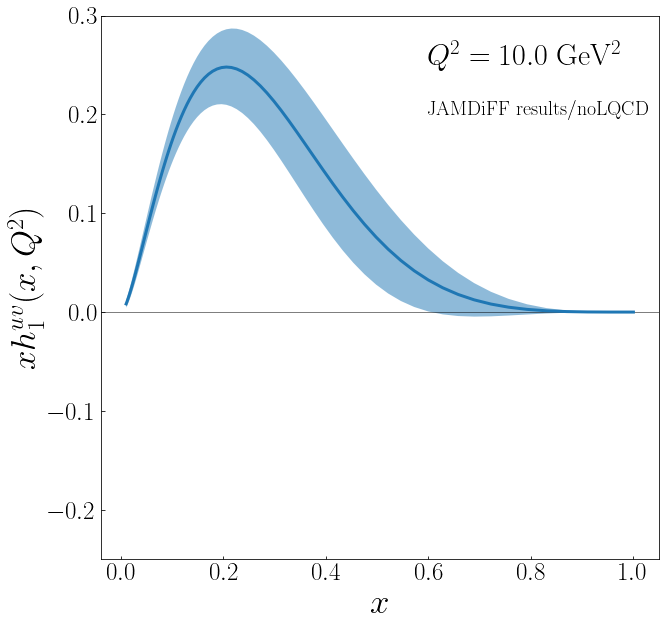

In [8]:
# Plot uv
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

flav = 'uv' # we plot transversity for thsi flavor

ax.set_ylim([-0.25,0.3])
ax.axhline(y=0,ls='-',lw=0.5,c='k')

# plot results
ax.plot(data['X'],data['XF'][flav]['mean'],lw=3) # Plot the mean transversity
ax.fill_between(data['X'],
                data['XF'][flav]['mean']-data['XF'][flav]['std'],
                data['XF'][flav]['mean']+data['XF'][flav]['std'],alpha=0.5) # Plot the uncertainty

# describe what we plot
ax.text(0.6,0.25,r'$Q^2=%.1f\; {\rm GeV^2}$'%Q2,size = 30)
ax.text(0.6,0.2,r'${\rm JAMDiFF\; %s}$'%wdir,size = 20)

# set labels
ax.tick_params(direction='in',labelsize=25)
ax.set_xlabel(r'$x$',size = 35)
ax.set_ylabel(r'$x h_{1}^{%s}(x,Q^2)$'%flav,size = 35)

plt.show()

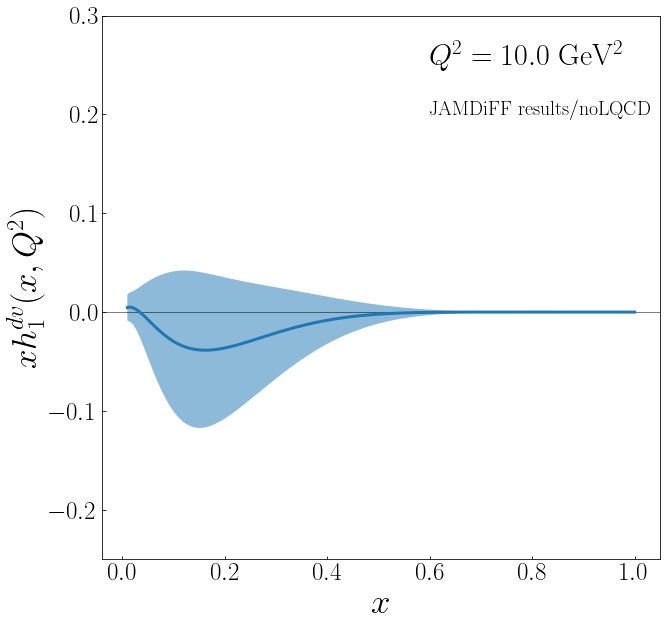

In [9]:
# Plot dv
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

flav = 'dv' # we plot transversity for thsi flavor

ax.set_ylim([-0.25,0.3])
ax.axhline(y=0,ls='-',lw=0.5,c='k')

# plot results
ax.plot(data['X'],data['XF'][flav]['mean'],lw=3) # Plot the mean transversity
ax.fill_between(data['X'],
                data['XF'][flav]['mean']-data['XF'][flav]['std'],
                data['XF'][flav]['mean']+data['XF'][flav]['std'],alpha=0.5) # Plot the uncertainty

# describe what we plot
ax.text(0.6,0.25,r'$Q^2=%.1f\; {\rm GeV^2}$'%Q2,size = 30)
ax.text(0.6,0.2,r'${\rm JAMDiFF\; %s}$'%wdir,size = 20)

# set labels
ax.tick_params(direction='in',labelsize=25)
ax.set_xlabel(r'$x$',size = 35)
ax.set_ylabel(r'$x h_{1}^{%s}(x,Q^2)$'%flav,size = 35)

plt.show()